___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

We'll focus on bank stocks and see how they progressed throughout the financial crisis

## Importing the necessary libraries

In [179]:
from pandas_datareader import data, wb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline

## Getting the data from different banks

In [41]:
# BAC = data.DataReader("BAC", 'yahoo', start='2006-01-01', end='2016-01-01')
# C = data.DataReader("C",'yahoo', start='2006-01-01', end='2016-01-01')
# GS = data.DataReader("GS",'yahoo', start='2006-01-01', end='2016-01-01')
# JMC = data.DataReader("JMC","morningstar", start='2006-01-01', end='2016-01-01')
# MS = data.DataReader("MS",'yahoo', start='2006-01-01', end='2016-01-01')
# WFC = data.DataReader("WFC",'yahoo', start='2006-01-01', end='2016-01-01')

In [13]:
df = pd.read_pickle('all_banks')

In [242]:
df['BAC']['Open']

Date
2006-01-03    46.92
2006-01-04    47.00
2006-01-05    46.58
2006-01-06    46.80
2006-01-09    46.72
              ...  
2015-12-24    17.32
2015-12-28    17.22
2015-12-29    17.25
2015-12-30    17.20
2015-12-31    17.01
Name: Open, Length: 2517, dtype: float64

In [30]:
# Create a list of the ticker symbols (as strings) in alphabetical order

tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [9]:
# Setting the column name levels:

bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [20]:
df.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09   1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  
2006-01-09   31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

In [66]:
#max Close price for each bank's stock throughout the time period

for banks in tickers:
    ans = df[banks]['Close'].max()
    print("{}: {}".format(banks, ans))
    
# bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

BAC: 54.9
C: 564.1
GS: 247.92
JPM: 70.08
MS: 89.3
WFC: 58.52


In [67]:
# Using pandas pct_change() method on the Close column to create a column representing this return value
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()

returns = pd.DataFrame()

In [93]:
returns.head()

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


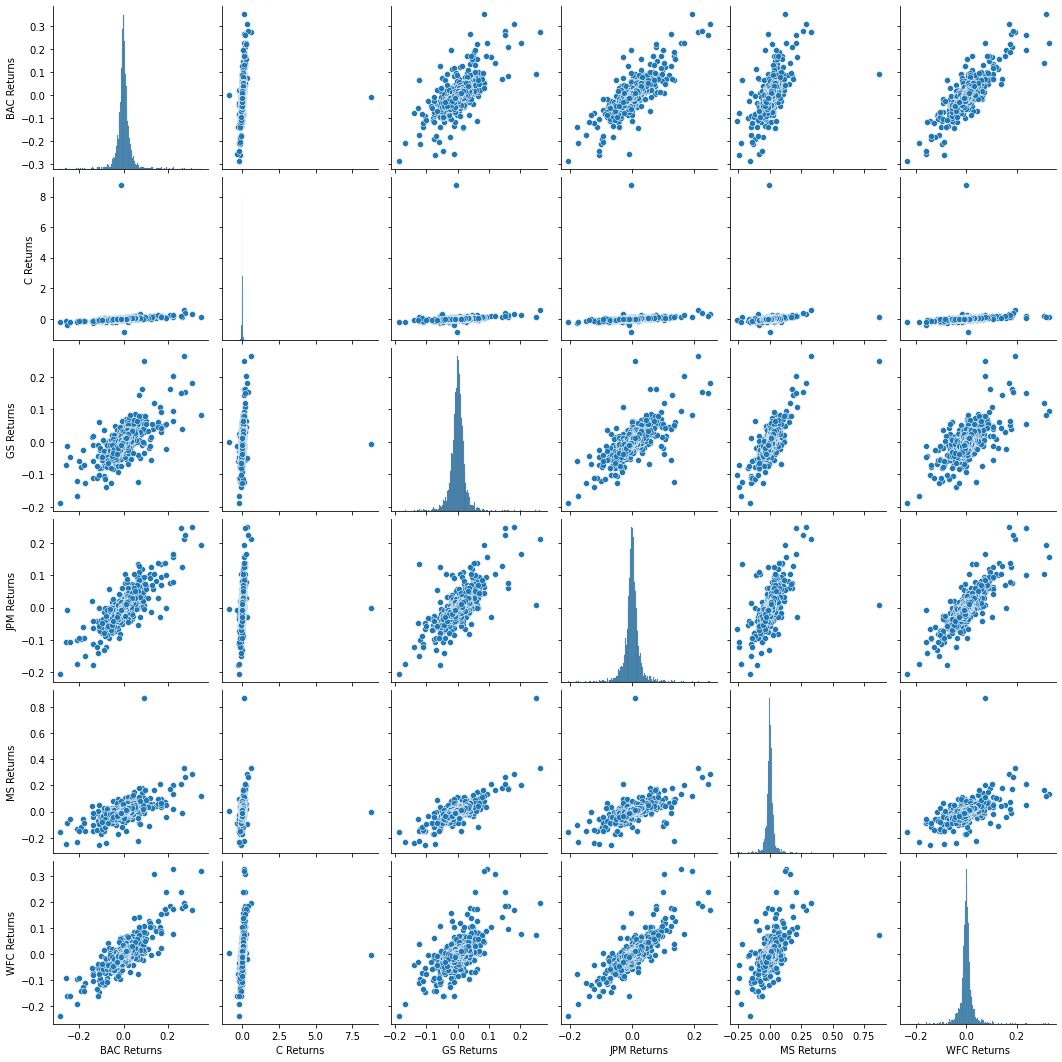

In [95]:
# Creating a pairplot using seaborn of the returns dataframe

sns.pairplot(returns)

We can see the enormous crash in value of Citibank's stocks if we take a look a the stock price plot

In [142]:
# Using this returns DataFrame, we can find out what dates each bank stock had the best and worst single day returns


returns.groupby('Date').max()

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


We can notice that Citigroup's largest drop and biggest gain were very close to one another. Little background check can tell us they had a stock split

In [147]:
# Best Single Day Gain
# citigroup stock split in May 2011, but also JPM day after inauguration.
returns.idxmin()

BAC Returns   2009-01-20
C Returns     2011-05-06
GS Returns    2009-01-20
JPM Returns   2009-01-20
MS Returns    2008-10-09
WFC Returns   2009-01-20
dtype: datetime64[ns]

In [148]:
returns.idxmax()

BAC Returns   2009-04-09
C Returns     2011-05-09
GS Returns    2008-11-24
JPM Returns   2009-01-21
MS Returns    2008-10-13
WFC Returns   2008-07-16
dtype: datetime64[ns]

In [149]:
#standard deviation of the returns

returns.std()

BAC Returns    0.036650
C Returns      0.179969
GS Returns     0.025346
JPM Returns    0.027656
MS Returns     0.037820
WFC Returns    0.030233
dtype: float64

We can see that citigroup is the riskiest

In [159]:
#Finding the riskiest stock in the year 2015


returns.loc['2015-01-01':'2015-12-31'].std()

BAC Returns    0.016163
C Returns      0.015289
GS Returns     0.014046
JPM Returns    0.014017
MS Returns     0.016249
WFC Returns    0.012591
dtype: float64

/home/m/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MS Returns', ylabel='Density'>

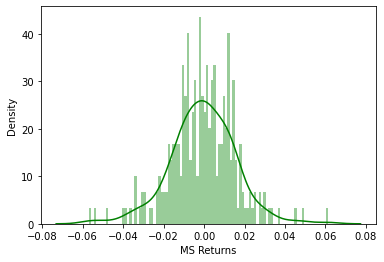

In [169]:
# Creating a distplot using seaborn of the 2015 returns for Morgan Stanley 

MS = returns.loc['2015-01-01':'2015-12-31']['MS Returns']
sns.distplot(MS, color='green', bins=100)

/home/m/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='C Returns', ylabel='Density'>

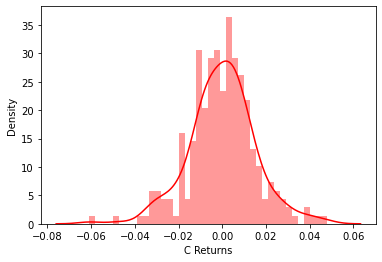

In [195]:
#Creating a distplot using seaborn of the 2008 returns for CitiGroup

CG = returns.loc['2015-01-01':'2015-12-31']['C Returns']
sns.distplot(CG, color='red', bins=40)

____
# More Visualization

### Imports

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

## Creating a line plot showing Close price for each bank for the entire index of time

<AxesSubplot:xlabel='Date'>

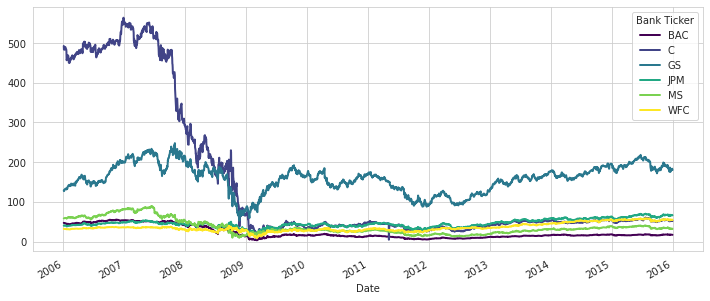

In [209]:
ghz= df.xs(key='Close',axis=1, level='Stock Info')
ghz.plot.line(figsize=(12,5), lw=2, cmap='viridis')

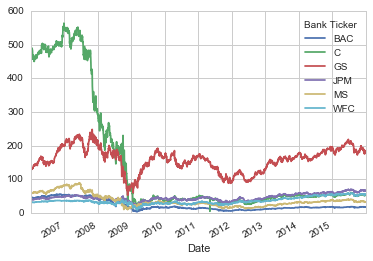

## Moving Averages

**Plotting the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

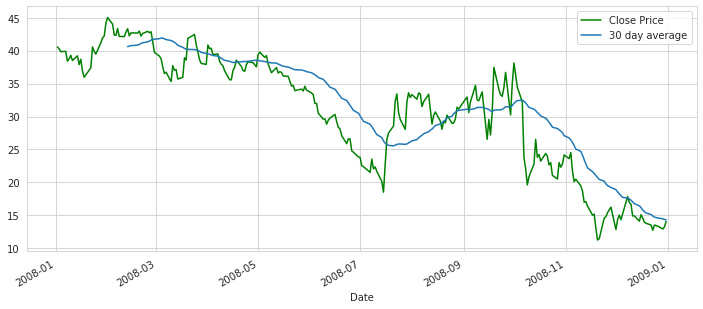

In [230]:
BOFA = df.loc['2008-01-01':'2008-12-31']['BAC']['Close']
BOFA.plot.line(figsize=(12,5), color='green',label='Close Price')
BOFA2= BAC['Close'].loc['2008-01-01':'2008-12-31'].rolling(window=30).mean()
BOFA2.plot.line(label='30 day average')
plt.legend()

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

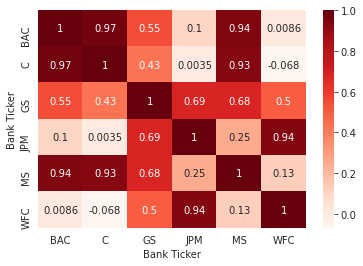

In [236]:
#Creating a heatmap to find the correlation between the stocks Close Price

FDC= df.xs(key='Close', axis=1, level='Stock Info')
tc = FDC.corr()
sns.heatmap(tc, annot=True, cmap="Reds")

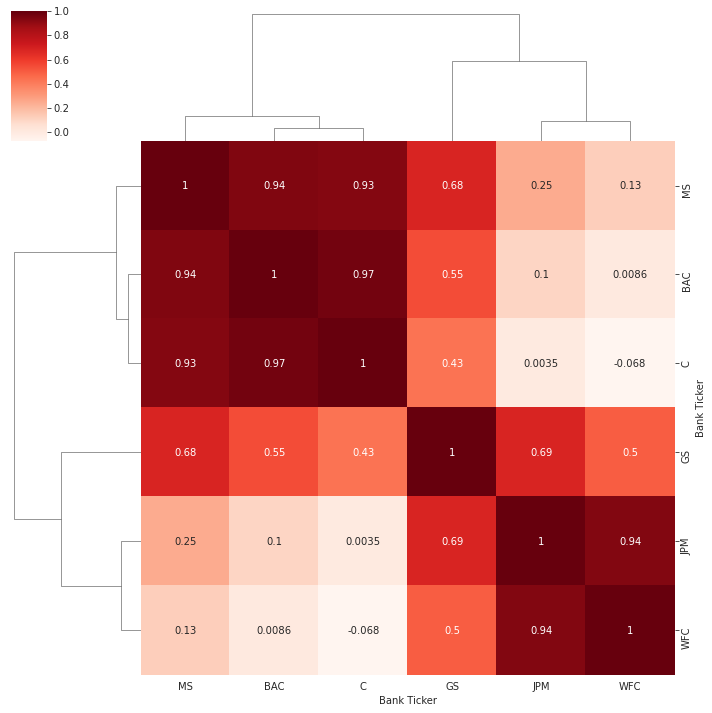

In [237]:
#Using Seaborn's clustermap to cluster the correlations together

sns.clustermap(tc, annot=True, cmap="Reds")

# This feature uses cufflinks so we might not be able to see the figures until we run the full code

**USing iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [259]:
import plotly.graph_objects as go
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected= True)
cf.go_offline()

# fig = go.Figure(data=[go.Candlestick(x=df['BAC'].loc['2015-01-01':'2016-01-01'],
#                 open=df['BAC']['Open'],
#                 high=df['BAC']['High'],
#                 low=df['BAC']['Low'],
#                 close=df['BAC']['Close'])])

# fig.iplot('Candle')
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

In [263]:
#Using .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015

df['MS']['Close'].loc['2015-01-01':'2015-12-31'].ta_plot(study='sma',periods=[13,21,55])

In [264]:
#Using .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.

df['BAC']['Close'].loc['2015-01-01':'2015-12-31'].ta_plot(study='boll',periods=[13,21,55])